In [1]:
# Librairies
import pandas as pd
import numpy as np
from azureml.core import Workspace, Dataset
import seaborn as sns

# Importation des données

Source des données : https://challengedata.ens.fr/participants/challenges/68/

In [2]:
# Variables explicatives pour l'entraînement
x_train = pd.read_csv('./data/X_train.csv')
x_train.head()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37368 entries, 0 to 37367
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_annonce                   37368 non-null  int64  
 1   property_type                37368 non-null  object 
 2   approximate_latitude         37368 non-null  float64
 3   approximate_longitude        37368 non-null  float64
 4   city                         37368 non-null  object 
 5   postal_code                  37368 non-null  int64  
 6   size                         36856 non-null  float64
 7   floor                        9743 non-null   float64
 8   land_size                    15581 non-null  float64
 9   energy_performance_value     19068 non-null  float64
 10  energy_performance_category  19068 non-null  object 
 11  ghg_value                    18530 non-null  float64
 12  ghg_category                 18530 non-null  object 
 13  exposition      

In [4]:
# Variable cible pour l'entraînement
y_train = pd.read_csv('./data/y_train.csv')
y_train.head()

,id_annonce,price
0,35996577,355000.0
1,35811033,190000.0
2,35731841,39000.0
3,35886765,299000.0
4,35781137,478000.0


In [5]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37368 entries, 0 to 37367
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_annonce  37368 non-null  int64  
 1   price       37368 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 584.0 KB


In [6]:
# Variables explicatives pour le test
x_test = pd.read_csv('./data/X_test.csv')
x_test.head()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35160615,maison,49.371670,3.533991,brenelle,2220,143.0,NaN,800.0,299.0,...,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35830639,propriété,49.037190,-0.982385,torigni-sur-vire,50160,470.0,NaN,28559.0,NaN,...,0.0,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,36016657,appartement,47.097180,6.149253,ornans,25290,135.0,NaN,NaN,NaN,...,0.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,35759225,appartement,43.699670,7.245556,nice,6000,3637.0,3.0,NaN,210.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35252229,divers,43.849435,6.215461,moustiers-sainte-marie,4360,600.0,NaN,NaN,NaN,...,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9339 entries, 0 to 9338
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_annonce                   9339 non-null   int64  
 1   property_type                9339 non-null   object 
 2   approximate_latitude         9339 non-null   float64
 3   approximate_longitude        9339 non-null   float64
 4   city                         9339 non-null   object 
 5   postal_code                  9339 non-null   int64  
 6   size                         9203 non-null   float64
 7   floor                        2485 non-null   float64
 8   land_size                    3852 non-null   float64
 9   energy_performance_value     4828 non-null   float64
 10  energy_performance_category  4828 non-null   object 
 11  ghg_value                    4679 non-null   float64
 12  ghg_category                 4679 non-null   object 
 13  exposition        

In [8]:
# Concaténation de xtrain et y_train
train = x_train.merge(y_train, how='inner', on='id_annonce')
train.head()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,price
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355000.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39000.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,299000.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,478000.0


In [9]:
train.shape

(37368, 28)

In [10]:
train.isnull().sum()

id_annonce                         0
property_type                      0
approximate_latitude               0
approximate_longitude              0
city                               0
postal_code                        0
size                             512
floor                          27625
land_size                      21787
energy_performance_value       18300
energy_performance_category    18300
ghg_value                      18838
ghg_category                   18838
exposition                     28274
nb_rooms                        1566
nb_bedrooms                     2733
nb_bathrooms                   13273
nb_parking_places                  0
nb_boxes                           0
nb_photos                          0
has_a_balcony                      0
nb_terraces                        0
has_a_cellar                       0
has_a_garage                       0
has_air_conditioning               0
last_floor                         0
upper_floors                       0
p

In [11]:
train.to_csv('./data/train_data.csv')

# Analyse exploratoire

A faire

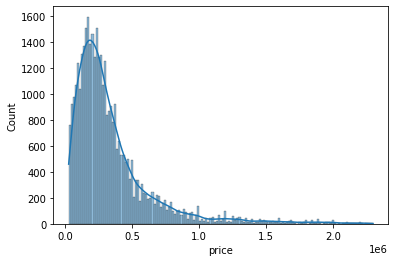

In [12]:
sns.histplot(data=train, x='price', kde=True);

# Enregistrement des ensembles de données dans l'espace de travail Azure

In [13]:
subscription_id = ''
resource_group = 'real-estate'
workspace_name = 'ws-real-estate'

In [14]:
# Connection à mon travail
ws = Workspace(subscription_id, resource_group, workspace_name)

In [15]:
# Datastore par défaut (Azure Blob Storage)
datastore = ws.get_default_datastore()

In [16]:
#import os
#os.remove('./data/X_train.csv')
#os.remove('./data/y_train.csv')

In [17]:
# Envoie du dossier data dans le datastore
datastore.upload(src_dir='data', target_path='data')

"Datastore.upload" is deprecated after version 1.0.69. Please use "Dataset.File.upload_directory" to upload your files             from a local directory and create FileDataset in single method call. See Dataset API change notice at https://aka.ms/dataset-deprecation.


Uploading an estimated of 2 files
Uploading data\X_test.csv
Uploaded data\X_test.csv, 1 files out of an estimated total of 2
Uploading data\train_data.csv
Uploaded data\train_data.csv, 2 files out of an estimated total of 2
Uploaded 2 files


$AZUREML_DATAREFERENCE_834c6f7fbad4499d882422f737371196

In [18]:
train_dataset = Dataset.Tabular.from_delimited_files(
    datastore.path('data/train_data.csv')
)

test_dataset = Dataset.Tabular.from_delimited_files(
    datastore.path('data/X_test.csv')
)

In [19]:
# Enregistrement dans l'espace de travail Azure
train_ds = train_dataset.register(
    workspace=ws,
    name='real_estate_train_data',
    description='French real Estate Train Data'
)

test_ds = test_dataset.register(
    workspace=ws,
    name='real_estate_test_data',
    description='French real Estate Test Data'
)